# Explore here

Import

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib


Loading Dataset

In [7]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
housing_data = pd.read_csv(url)

In [8]:
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
housing_data.isnull

<bound method DataFrame.isnull of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

     

In [10]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
# Selecting only the required columns
housing_data = housing_data[['Latitude','Longitude', 'MedInc']]

In [14]:
# Split the dataset into training and test sets
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

Biulding a K-means Model

In [15]:
# Initialize KMeans with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model to the training set
train_set['cluster'] = kmeans.fit_predict(train_set[['Latitude', 'Longitude', 'MedInc']])

# Add the cluster labels to the test set
test_set['cluster'] = kmeans.predict(test_set[['Latitude', 'Longitude', 'MedInc']])

# Check the resulting dataset
print(train_set.head())

       Latitude  Longitude  MedInc  cluster
14196     32.71    -117.03  3.2596        3
8267      33.77    -118.16  3.8125        1
17445     34.66    -120.48  4.1563        1
14265     32.69    -117.11  1.9425        3
2271      36.78    -119.80  3.5542        5


Plot the Clusters

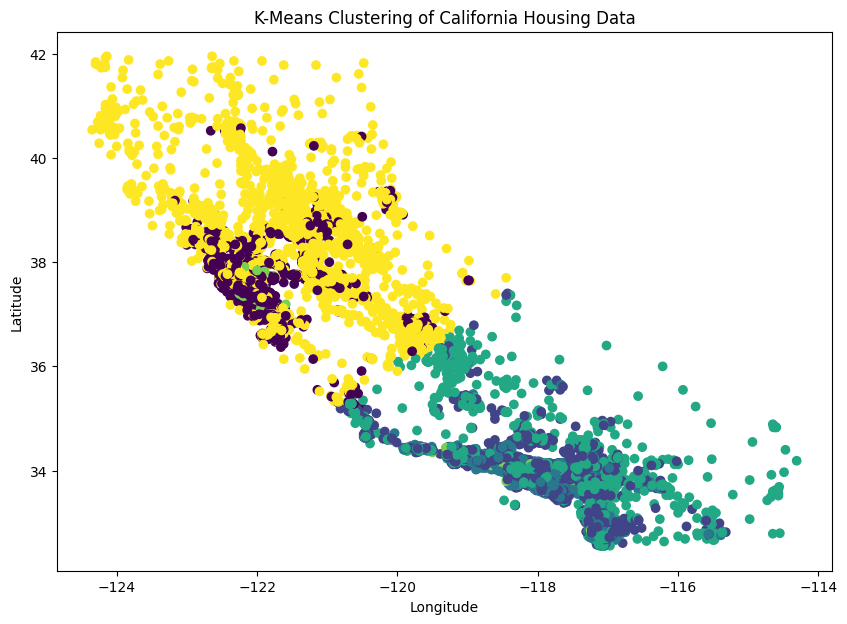

In [18]:
# Plot the clusters for the training set
plt.figure(figsize=(10, 7))
plt.scatter(train_set['Longitude'], train_set['Latitude'], c=train_set['cluster'], cmap='viridis', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of California Housing Data')
plt.show()

Supervided Classification Model

In [20]:
# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)


In [21]:
# Train the classifier on the training set
classifier.fit(train_set[['Latitude', 'Longitude', 'MedInc']], train_set['cluster'])


DecisionTreeClassifier(random_state=42)

In [23]:
test_predictions = classifier.predict(test_set[['Latitude', 'Longitude', 'MedInc']])

print("Accuracy:", accuracy_score(test_set['cluster'], test_predictions))
print(classification_report(test_set['cluster'], test_predictions))

Accuracy: 0.9941860465116279
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       561
           1       1.00      0.99      1.00       983
           2       1.00      0.99      0.99       299
           3       0.99      1.00      0.99      1111
           4       0.94      0.98      0.96        62
           5       1.00      0.99      1.00      1112

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



Save the Model 

In [25]:
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [26]:
joblib.dump(classifier, 'decision_tree_model.pkl')

['decision_tree_model.pkl']